In [3]:
!pip install lingua-language-detector
!pip download lingua-language-detector -d ./lingua-py
!pip install lingua-language-detector --force-reinstall --no-cache-dir

  File was already downloaded /kaggle/working/lingua-py/lingua_language_detector-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Successfully downloaded lingua-language-detector
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 MB 233.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: lingua-language-detector
    Found existing installation: lingua-language-detector 2.0.2
    Uninstalling lingua-language-detector-2.0.2:
      Successfully uninstalled lingua-language-detector-2.0.2


In [28]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import re
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import requests
import json
from lingua import LanguageDetectorBuilder, Language, IsoCode639_1, IsoCode639_3
from enum import Enum
df = pd.read_csv("/kaggle/input/testset/Sample-Data-for-Hackathon.csv")
reference_array = [29, 30, 32, 33, 34]
print(reference_array)

[29, 30, 32, 33, 34]


In [31]:
main_params = []
for index, column in enumerate(df.columns):
    column_info = {
        f"p{index}": column,
    }
    if(index in reference_array):
        main_params.append(column_info)

json_data = json.dumps(main_params, indent=0)
print(json_data)

[
{
"p29": "Q16A. What is the most important thing you LIKE about the shown concept}?     This can include anything you would want kept for sure or aspects that might drive you to buy or try it\u2026       Please type a detailed response in the space below"
},
{
"p30": "Q16B. What is the most important thing you DISLIKE about the shown concept}?    This can include general concerns, annoyances, or any aspects of the product that need fixed for this to be more appealing to you...     Please type a detailed response in the space below."
},
{
"p32": "Q18_1 What specific product that you are currently using would the shown product replace?\n Please type in ONE specific brand or product per space provided."
},
{
"p33": "Q18_2 What specific product that you are currently using would the shown concept replace?\n Please type in ONE specific brand or product per space provided."
},
{
"p34": "Q18_3 What specific product that you are currently using would the shown concept replace?\n Please type 

In [32]:
def get_row_data(row_number, reference_array):
    
    if row_number < 0 or row_number >= df.shape[0]:
        return {"error": f"Row number {row_number} is out of bounds. The dataset has {df.shape[0]} rows."}
    row_data = df.iloc[row_number]
    values = []
    
    for index in reference_array:
        if index < len(df.columns):
            column_name = df.columns[index]
            values.append(row_data[column_name])
    return values

for i in range(1,80):
    print(get_row_data(i,reference_array))

["It's a classic brand.", 'Nothing specific to dislike.', nan, nan, nan]
['Taste', 'The glass', nan, nan, nan]
['Why?', 'Pure is a misnomer', nan, nan, nan]
['I have a lot to say', 'Not really', nan, 'Beer', 'Drink']
['I love Michelob brand and the bottle shape and color is ery appealing', 'There is nothing I dislike', nan, nan, nan]
["it's michelob", 'nothing', 'michelob ultra', 'na', 'na']
["I don't", 'Dislike', nan, nan, nan]
['Michelob ULTRA Pure Gold is distinguished by its use of organic ingredients and refreshing taste, with low calories.', 'Nothing', 'Other Light lagers', 'regular lagers or ales', 'Hard Seltzers']
['That it had less calories', 'Nothing', nan, nan, nan]
['No response', 'No response', nan, nan, nan]
['Smooth taste', 'I prefer Ultra Gold  nothing that I dislike', nan, nan, nan]
["I would buy it if they were out of my regular beer. It's not bad and is more refreshing than some other light beers.", 'It can be a bit harsh on the after taste but not too bad.', 'Keysto

In [33]:
from lingua import Language, LanguageDetectorBuilder
import re


def output_mapper(row_number_input):
    predicted_flag = False
    confidence_score_data  = 0
    return int(predicted_flag),confidence_score_data

languages = [
    Language.ENGLISH, Language.FRENCH, Language.GERMAN,
    Language.SPANISH, Language.ITALIAN, Language.CHINESE,
    Language.JAPANESE, Language.RUSSIAN, Language.ARABIC,
    Language.PORTUGUESE
]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    return re.sub(r'[^a-zA-Z\s]', '', text).strip()

#Uncomment it for language detection
for i in range(1,83):
    row_data = get_row_data(i, reference_array) 

    processed_text = preprocess_text(str(row_data)) 
    if processed_text:  
        detected_language = detector.detect_language_of(processed_text)
        print(f"Row {i}: Detected Language -> {detected_language}")
    else:
        print(f"Row {i}: No valid text detected")


Row 1: Detected Language -> Language.ENGLISH
Row 2: Detected Language -> Language.ENGLISH
Row 3: Detected Language -> Language.ENGLISH
Row 4: Detected Language -> Language.ENGLISH
Row 5: Detected Language -> Language.ENGLISH
Row 6: Detected Language -> Language.ENGLISH
Row 7: Detected Language -> Language.ENGLISH
Row 8: Detected Language -> Language.ENGLISH
Row 9: Detected Language -> Language.ENGLISH
Row 10: Detected Language -> Language.FRENCH
Row 11: Detected Language -> Language.ENGLISH
Row 12: Detected Language -> Language.ENGLISH
Row 13: Detected Language -> Language.ENGLISH
Row 14: Detected Language -> Language.ENGLISH
Row 15: Detected Language -> Language.ENGLISH
Row 16: Detected Language -> Language.ENGLISH
Row 17: Detected Language -> Language.ENGLISH
Row 18: Detected Language -> Language.ENGLISH
Row 19: Detected Language -> Language.ENGLISH
Row 20: Detected Language -> Language.ENGLISH
Row 21: Detected Language -> Language.ENGLISH
Row 22: Detected Language -> Language.ENGLIS

In [55]:
lang_dict = {
    "ENGLISH": [],
    "ITALIAN": [],
    "GERMAN": [],
    "PORTUGUESE": [],
    "SPANISH": [],
    "FRENCH": [],
    "ARABIC": [],
    "CHINESE": [],
    "JAPANESE": [],
    "RUSSIAN": []
}

for i in range(1, 80):
    print(f"{i} ========================================================")

    row_data = get_row_data(i, reference_array)

    if row_data:
        confidence_values = detector.compute_language_confidence_values(str(row_data))
        row_confidence = {lang: 0.0 for lang in lang_dict.keys()}

        for confidence in confidence_values:
            lang_name = confidence.language.name 
            if lang_name in lang_dict: 
                row_confidence[lang_name] = confidence.value

        for lang in lang_dict.keys():
            lang_dict[lang].append(row_confidence[lang])

        for lang, score in row_confidence.items():
            print(f"{lang}: {score:.2f}")

    else:
        print("No valid text detected")
        for lang in lang_dict.keys():
            lang_dict[lang].append(0.0)  


print(lang_dict)

1 ========================================================
ENGLISH: 0.90
ITALIAN: 0.05
GERMAN: 0.02
PORTUGUESE: 0.02
SPANISH: 0.01
FRENCH: 0.01
ARABIC: 0.00
CHINESE: 0.00
JAPANESE: 0.00
RUSSIAN: 0.00
2 ========================================================
ENGLISH: 0.43
ITALIAN: 0.12
GERMAN: 0.32
PORTUGUESE: 0.05
SPANISH: 0.02
FRENCH: 0.07
ARABIC: 0.00
CHINESE: 0.00
JAPANESE: 0.00
RUSSIAN: 0.00
3 ========================================================
ENGLISH: 0.58
ITALIAN: 0.15
GERMAN: 0.06
PORTUGUESE: 0.09
SPANISH: 0.07
FRENCH: 0.06
ARABIC: 0.00
CHINESE: 0.00
JAPANESE: 0.00
RUSSIAN: 0.00
4 ========================================================
ENGLISH: 0.94
ITALIAN: 0.01
GERMAN: 0.03
PORTUGUESE: 0.01
SPANISH: 0.01
FRENCH: 0.01
ARABIC: 0.00
CHINESE: 0.00
JAPANESE: 0.00
RUSSIAN: 0.00
5 ========================================================
ENGLISH: 0.99
ITALIAN: 0.00
GERMAN: 0.01
PORTUGUESE: 0.00
SPANISH: 0.00
FRENCH: 0.00
ARABIC: 0.00
CHINESE: 0.00
JAPANESE: 0.00
RUSSIAN: 0.00


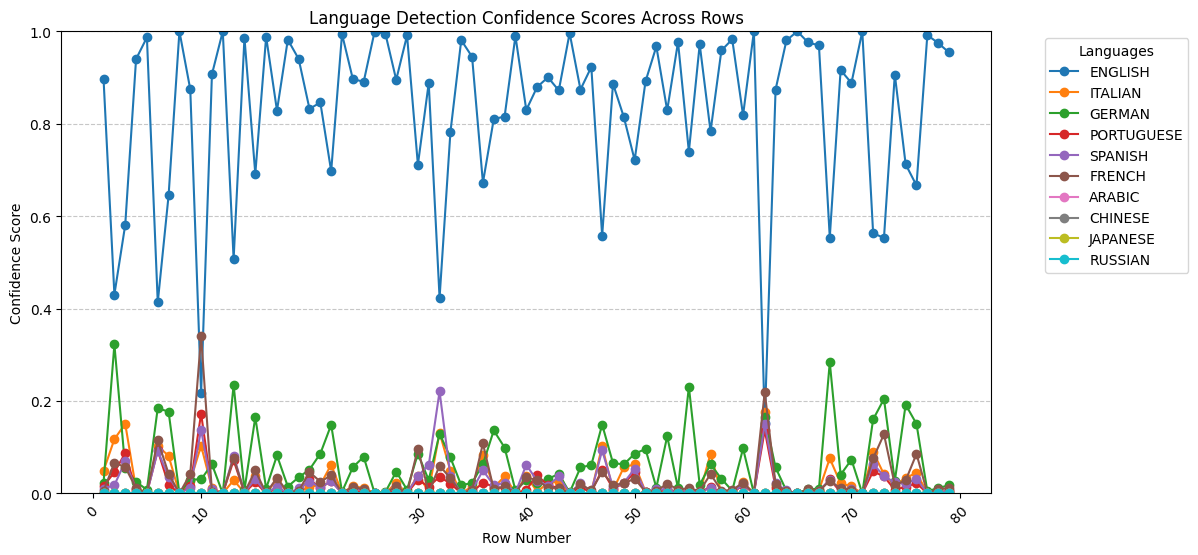

In [56]:
import matplotlib.pyplot as plt

# Create an x-axis (row numbers)
row_indices = list(range(1, 80))

# Plot confidence scores for each language
plt.figure(figsize=(12, 6))

for lang, values in lang_dict.items():
    plt.plot(row_indices, values, label=lang, marker='o', linestyle='-')

plt.xlabel("Row Number")
plt.ylabel("Confidence Score")
plt.title("Language Detection Confidence Scores Across Rows")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Languages", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [52]:
#3 regions to work with for the english data
for i in range(1, 80):
    english_confidence = lang_dict["ENGLISH"][i - 1]

    if english_confidence < 0.8:
        row_text = get_row_data(i, reference_array)
        print(f"Row {i} (Confidence: {english_confidence:.2f}): {row_text}")


Row 2 (Confidence: 0.45): ['Taste', 'The glass', nan, nan, nan]
Row 3 (Confidence: 0.41): ['Why?', 'Pure is a misnomer', nan, nan, nan]
Row 10 (Confidence: 0.23): ['No response', 'No response', nan, nan, nan]
Row 13 (Confidence: 0.45): ['I don’t like it.', 'It looks bad.', 'Budweiser', 'Carona', 'Miller']
Row 14 (Confidence: 0.75): ['I have try it see how smoothly it goes down', 'I have no dislikes', 'Corona', 'Bud light', 'Miller light']
Row 17 (Confidence: 0.34): ['Quality', 'Not sure', 'Good', 'Gold', 'Usda']
Row 20 (Confidence: 0.54): ['i didnt say i did', 'i dont do light beer', nan, nan, nan]
Row 22 (Confidence: 0.15): ['The taste and quality', nan, nan, nan, nan]
Row 25 (Confidence: 0.25): ['It sounds interesting', 'none', 'coors light', 'keystone light', 'bud light']
Row 26 (Confidence: 0.66): ['Its packaging is appealing right off the bat. Its rich and thick taste basically makes my mouth salivate.', 'It looks perfect.', 'Corona', 'Beck’s', 'Heineken']
Row 30 (Confidence: 0.63

In [53]:
for i in range(1, 80):
    english_confidence = lang_dict["ENGLISH"][i - 1]
    row_text = get_row_data(i, reference_array)
    word_count = len(str(row_text[0]).split())  # Count words in the row
    print(f"Row {i} (Confidence: {english_confidence:.2f}, Words: {word_count}): {row_text}")


Row 1 (Confidence: 0.93, Words: 4): ["It's a classic brand.", 'Nothing specific to dislike.', nan, nan, nan]
Row 2 (Confidence: 0.45, Words: 1): ['Taste', 'The glass', nan, nan, nan]
Row 3 (Confidence: 0.41, Words: 1): ['Why?', 'Pure is a misnomer', nan, nan, nan]
Row 4 (Confidence: 0.92, Words: 6): ['I have a lot to say', 'Not really', nan, 'Beer', 'Drink']
Row 5 (Confidence: 0.92, Words: 13): ['I love Michelob brand and the bottle shape and color is ery appealing', 'There is nothing I dislike', nan, nan, nan]
Row 6 (Confidence: 0.92, Words: 2): ["it's michelob", 'nothing', 'michelob ultra', 'na', 'na']
Row 7 (Confidence: 0.82, Words: 2): ["I don't", 'Dislike', nan, nan, nan]
Row 8 (Confidence: 0.92, Words: 18): ['Michelob ULTRA Pure Gold is distinguished by its use of organic ingredients and refreshing taste, with low calories.', 'Nothing', 'Other Light lagers', 'regular lagers or ales', 'Hard Seltzers']
Row 9 (Confidence: 0.92, Words: 5): ['That it had less calories', 'Nothing', nan

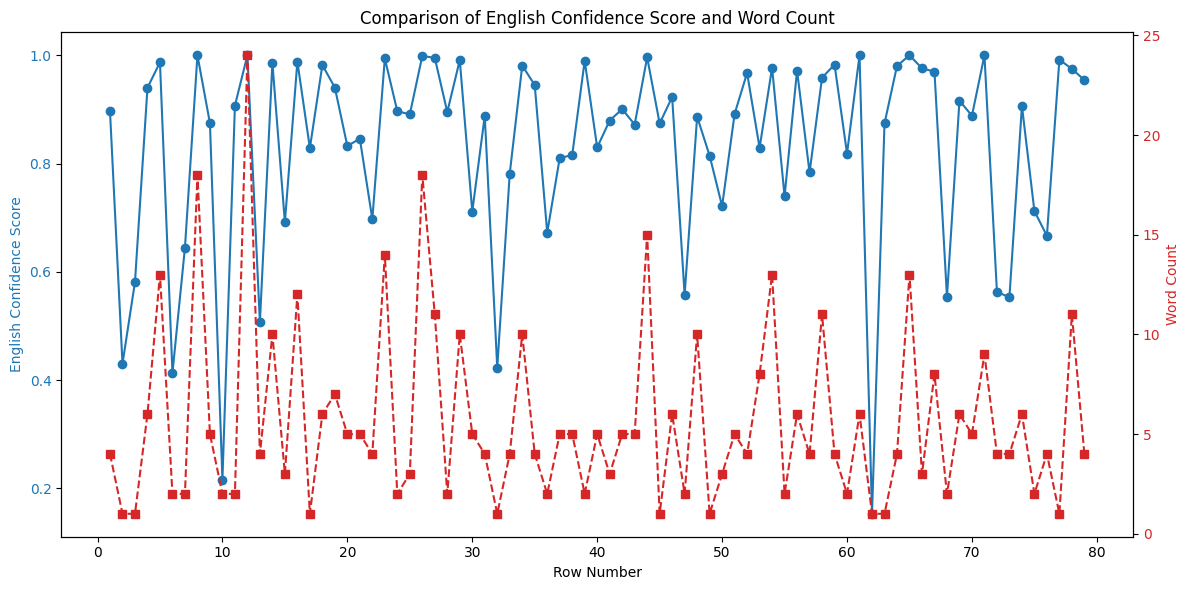

In [57]:
import matplotlib.pyplot as plt

row_indices = list(range(1, 80))
word_counts = []  # Store word counts for each row
english_confidences = lang_dict["ENGLISH"]  # English confidence scores

# Calculate word count for each row
for i in range(1, 80):
    row_text = get_row_data(i, reference_array)
    word_count = len(str(row_text[0]).split())  # Count words in the row
    word_counts.append(word_count)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot English confidence scores
ax1.set_xlabel("Row Number")
ax1.set_ylabel("English Confidence Score", color="tab:blue")
ax1.plot(row_indices, english_confidences, label="English Confidence", marker="o", linestyle="-", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis for word count
ax2 = ax1.twinx()
ax2.set_ylabel("Word Count", color="tab:red")
ax2.plot(row_indices, word_counts, label="Word Count", marker="s", linestyle="--", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and legend
plt.title("Comparison of English Confidence Score and Word Count")
fig.tight_layout()
plt.show()
